In [2]:
import requests
import os
page = requests.get("https://www.worldometers.info/coronavirus")

In [3]:
url = 'https://www.worldometers.info/coronavirus'

In [4]:
page.status_code

200

b'\n<!DOCTYPE html>\n<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->\n<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->\n<!--[if !IE]><!-->\n<html lang="en">\n<!--<![endif]-->\n<head>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1">\n<title>Coronavirus Update (Live): 75,396,939 Cases and 1,670,850 Deaths from COVID-19 Virus Pandemic - Worldometer</title>\n<meta name="description" content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates">\n\n<link rel="shortcut icon" href="/favicon/favicon.ico" type="image/x-icon">\n<link rel="apple-touch-icon" sizes="57x57" href="/favicon/apple-icon-57x57.png">\n<lin
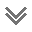

In [5]:
page.content

In [6]:
from bs4 import BeautifulSoup

In [7]:
soup = BeautifulSoup(page.content, 'html.parser')

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   Coronavirus Update (Live): 75,396,939 Cases and 1,670,850 Deaths from COVID-19 Virus Pandemic - Worldometer
  </title>
  <meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
  <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x5
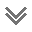

In [8]:
print(soup.prettify())

In [9]:
table = soup.find('table', attrs={'id': 'main_table_countries_today'})

In [10]:
table

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br>Other</br></th>
<th width="20">Total<br>Cases</br></th>
<th width="30">New<br>Cases</br></th>
<th width="30">Total<br>Deaths</br></th>
<th width="30">New<br>Deaths</br></th>
<th width="30">Total<br>Recovered</br></th>
<th width="30">New<br>Recovered</br></th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
</tr>
</thead>
<tbody>
<tr class="total_row_world row_co

In [11]:
rows = table.find_all("tr", attrs={"style": ""})

In [12]:
data = []
for i,item in enumerate(rows):
    
    if i == 0:
        
        data.append(item.text.strip().split("\n")[:15])
        
    else:
        data.append(item.text.strip().split("\n")[:15])

In [13]:
data

[['#',
  'Country,Other',
  'TotalCases',
  'NewCases',
  'TotalDeaths',
  'NewDeaths',
  'TotalRecovered',
  'NewRecovered',
  'ActiveCases',
  'Serious,Critical',
  'Tot\xa0Cases/1M pop',
  'Deaths/1M pop',
  'TotalTests',
  'Tests/',
  '1M pop'],
 ['World',
  '75,396,939',
  '+135,805',
  '1,670,850',
  '+3,334',
  '52,951,207',
  '+108,696',
  '20,774,882',
  '107,227',
  '9,673',
  '214.4',
  '',
  '',
  '',
  'All'],
 ['1',
  'USA',
  '17,627,070',
  '',
  '317,929 ',
  '',
  '10,291,126',
  '',
  '7,018,015',
  '28,206',
  '53,109',
  '958',
  '228,609,073',
  '688,785',
  '331,902,144 '],
 ['2',
  'India',
  '9,979,447',
  '+1,613',
  '144,829 ',
  '',
  '9,520,827',
  '+783',
  '313,791',
  '8,944',
  '7,199',
  '104',
  '158,918,646',
  '114,637',
  '1,386,271,357 '],
 ['3',
  'Brazil',
  '7,111,527',
  '',
  '184,876 ',
  '',
  '6,177,702',
  '',
  '748,949',
  '8,318',
  '33,347',
  '867',
  '25,700,000',
  '120,511',
  '213,258,918 '],
 ['4',
  'Russia',
  '2,791,220',
  '

In [15]:
import pandas as pd
import numpy as np

df = pd.DataFrame(data)
df = pd.DataFrame(data[1:], columns=data[0][:15])

In [16]:
df.head()

# Country,Other  TotalCases   NewCases TotalDeaths   NewDeaths  \
0  World    75,396,939    +135,805  1,670,850      +3,334  52,951,207   
1      1           USA  17,627,070               317,929                
2      2         India   9,979,447     +1,613    144,829                
3      3        Brazil   7,111,527               184,876                
4      4        Russia   2,791,220    +28,552     49,762         +611   

  TotalRecovered NewRecovered ActiveCases Serious,Critical Tot Cases/1M pop  \
0       +108,696   20,774,882     107,227            9,673            214.4   
1     10,291,126                7,018,015           28,206           53,109   
2      9,520,827         +783     313,791            8,944            7,199   
3      6,177,702                  748,949            8,318           33,347   
4      2,228,633      +26,093     512,825            2,300           19,123   

  Deaths/1M pop   TotalTests   Tests/          1M pop  
0                                                 All  
1           958  228,609,073  688,785    331,902,144   
2           104  158,918,646  114,637  1,386,271,357   
3           867   25,700,000  120,511    213,258,918   
4           341   84,904,111  581,680    145,963,586

In [17]:
world_data_df = df
world_data_df.head()

# Country,Other  TotalCases   NewCases TotalDeaths   NewDeaths  \
0  World    75,396,939    +135,805  1,670,850      +3,334  52,951,207   
1      1           USA  17,627,070               317,929                
2      2         India   9,979,447     +1,613    144,829                
3      3        Brazil   7,111,527               184,876                
4      4        Russia   2,791,220    +28,552     49,762         +611   

  TotalRecovered NewRecovered ActiveCases Serious,Critical Tot Cases/1M pop  \
0       +108,696   20,774,882     107,227            9,673            214.4   
1     10,291,126                7,018,015           28,206           53,109   
2      9,520,827         +783     313,791            8,944            7,199   
3      6,177,702                  748,949            8,318           33,347   
4      2,228,633      +26,093     512,825            2,300           19,123   

  Deaths/1M pop   TotalTests   Tests/          1M pop  
0                                                 All  
1           958  228,609,073  688,785    331,902,144   
2           104  158,918,646  114,637  1,386,271,357   
3           867   25,700,000  120,511    213,258,918   
4           341   84,904,111  581,680    145,963,586

In [18]:
world_data_1_df = world_data_df.drop(columns = {'NewCases', 'NewDeaths', 'NewRecovered', 'Serious,Critical', 'Deaths/1M pop', 'Tests/', 'Tot\xa0Cases/1M pop'})
world_data_1_df.head()

# Country,Other  TotalCases TotalDeaths TotalRecovered ActiveCases  \
0  World    75,396,939    +135,805      +3,334       +108,696     107,227   
1      1           USA  17,627,070    317,929      10,291,126   7,018,015   
2      2         India   9,979,447    144,829       9,520,827     313,791   
3      3        Brazil   7,111,527    184,876       6,177,702     748,949   
4      4        Russia   2,791,220     49,762       2,228,633     512,825   

    TotalTests          1M pop  
0                          All  
1  228,609,073    331,902,144   
2  158,918,646  1,386,271,357   
3   25,700,000    213,258,918   
4   84,904,111    145,963,586

In [19]:
world_data_2_df = world_data_1_df.rename(
    columns= {"#": "id",
              "Country,Other":"Country.Country",
              "TotalCases":"Total_Cases",
              "TotalDeaths":"Total_Deaths",
              "TotalRecovered":"Total_Recovered",
              "ActiveCases":"Active_Cases",
              "TotalTests":"Total_Tests",
              "1M pop":"Population"
             })
world_data_2_df.head()

id Country.Country Total_Cases Total_Deaths Total_Recovered  \
0  World      75,396,939    +135,805       +3,334        +108,696   
1      1             USA  17,627,070     317,929       10,291,126   
2      2           India   9,979,447     144,829        9,520,827   
3      3          Brazil   7,111,527     184,876        6,177,702   
4      4          Russia   2,791,220      49,762        2,228,633   

  Active_Cases  Total_Tests      Population  
0      107,227                          All  
1    7,018,015  228,609,073    331,902,144   
2      313,791  158,918,646  1,386,271,357   
3      748,949   25,700,000    213,258,918   
4      512,825   84,904,111    145,963,586

In [20]:
world_data_2_df.dtypes

id                 object
Country.Country    object
Total_Cases        object
Total_Deaths       object
Total_Recovered    object
Active_Cases       object
Total_Tests        object
Population         object
dtype: object

In [21]:
world_data_2_df.head()

id Country.Country Total_Cases Total_Deaths Total_Recovered  \
0  World      75,396,939    +135,805       +3,334        +108,696   
1      1             USA  17,627,070     317,929       10,291,126   
2      2           India   9,979,447     144,829        9,520,827   
3      3          Brazil   7,111,527     184,876        6,177,702   
4      4          Russia   2,791,220      49,762        2,228,633   

  Active_Cases  Total_Tests      Population  
0      107,227                          All  
1    7,018,015  228,609,073    331,902,144   
2      313,791  158,918,646  1,386,271,357   
3      748,949   25,700,000    213,258,918   
4      512,825   84,904,111    145,963,586

In [22]:
cols = ['id', 'Total_Cases', 'Total_Deaths', 'Total_Recovered', 'Active_Cases', 'Total_Tests', 'Population']
world_data_2_df[cols] = world_data_2_df[cols].replace({'\$': '', ',': ''}, regex=True)

In [23]:
world_data_2_df.head()

id Country.Country Total_Cases Total_Deaths Total_Recovered  \
0  World      75,396,939     +135805        +3334         +108696   
1      1             USA    17627070      317929         10291126   
2      2           India     9979447      144829          9520827   
3      3          Brazil     7111527      184876          6177702   
4      4          Russia     2791220       49762          2228633   

  Active_Cases Total_Tests   Population  
0       107227                      All  
1      7018015   228609073   331902144   
2       313791   158918646  1386271357   
3       748949    25700000   213258918   
4       512825    84904111   145963586

In [24]:
world_data_3_df = world_data_2_df.drop(world_data_2_df.index[0])

In [25]:
world_data_3_df.head()

id Country.Country Total_Cases Total_Deaths Total_Recovered Active_Cases  \
1  1             USA    17627070      317929         10291126      7018015   
2  2           India     9979447      144829          9520827       313791   
3  3          Brazil     7111527      184876          6177702       748949   
4  4          Russia     2791220       49762          2228633       512825   
5  5          France     2427316       59619           181506      2186191   

  Total_Tests   Population  
1   228609073   331902144   
2   158918646  1386271357   
3    25700000   213258918   
4    84904111   145963586   
5    29698029    65340640

In [26]:
world_data_3_df['id'] = pd.to_numeric(world_data_3_df['id'], errors='coerce').astype('Int64')
world_data_3_df['Total_Cases'] = pd.to_numeric(world_data_3_df['Total_Cases'], errors='coerce').astype('Int64')
world_data_3_df['Total_Deaths'] = pd.to_numeric(world_data_3_df['Total_Deaths'], errors='coerce').astype('Int64')
world_data_3_df['Total_Recovered'] = pd.to_numeric(world_data_3_df['Total_Recovered'], errors='coerce').astype('Int64')
world_data_3_df['Active_Cases'] = pd.to_numeric(world_data_3_df['Active_Cases'], errors='coerce').astype('Int64')
world_data_3_df['Total_Tests'] = pd.to_numeric(world_data_3_df['Total_Tests'], errors='coerce').astype('Int64')
world_data_3_df['Population'] = pd.to_numeric(world_data_3_df['Population'], errors='coerce').astype('Int64')

In [27]:
world_data_3_df.head()

id Country.Country  Total_Cases  Total_Deaths  Total_Recovered  \
1   1             USA     17627070        317929         10291126   
2   2           India      9979447        144829          9520827   
3   3          Brazil      7111527        184876          6177702   
4   4          Russia      2791220         49762          2228633   
5   5          France      2427316         59619           181506   

   Active_Cases  Total_Tests  Population  
1       7018015    228609073   331902144  
2        313791    158918646  1386271357  
3        748949     25700000   213258918  
4        512825     84904111   145963586  
5       2186191     29698029    65340640

In [28]:
world_data_3_df.dtypes

id                  Int64
Country.Country    object
Total_Cases         Int64
Total_Deaths        Int64
Total_Recovered     Int64
Active_Cases        Int64
Total_Tests         Int64
Population          Int64
dtype: object

In [29]:
world_data_3_df.head()

id Country.Country  Total_Cases  Total_Deaths  Total_Recovered  \
1   1             USA     17627070        317929         10291126   
2   2           India      9979447        144829          9520827   
3   3          Brazil      7111527        184876          6177702   
4   4          Russia      2791220         49762          2228633   
5   5          France      2427316         59619           181506   

   Active_Cases  Total_Tests  Population  
1       7018015    228609073   331902144  
2        313791    158918646  1386271357  
3        748949     25700000   213258918  
4        512825     84904111   145963586  
5       2186191     29698029    65340640

In [30]:
world_data_4_df = world_data_3_df.dropna()

In [31]:
world_data_4_df.head()

id Country.Country  Total_Cases  Total_Deaths  Total_Recovered  \
1   1             USA     17627070        317929         10291126   
2   2           India      9979447        144829          9520827   
3   3          Brazil      7111527        184876          6177702   
4   4          Russia      2791220         49762          2228633   
5   5          France      2427316         59619           181506   

   Active_Cases  Total_Tests  Population  
1       7018015    228609073   331902144  
2        313791    158918646  1386271357  
3        748949     25700000   213258918  
4        512825     84904111   145963586  
5       2186191     29698029    65340640